In [1]:
import mne 
import pandas
import numpy as np
import matplotlib

In [2]:
raw=mne.io.read_raw_gdf("./dataset_eeg/BCICIV_2a_gdf/A05T.gdf",eog=["EOG-left", "EOG-central", "EOG-right"])
#we have defined the eog channels as in gdf file we don't want eog channels to be concider as eeg channels

Extracting EDF parameters from c:\Users\mshar\OneDrive\डेस्कटॉप\BCI eeg imagery motor movement\dataset_eeg\BCICIV_2a_gdf\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


c:\Users\mshar\.conda\envs\gpupy310\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [5]:
raw

Measurement date,"December 16, 2004 12:00:00 GMT"
Experimenter,Unknown
Participant,A05
Digitized points,Not available
Good channels,"22 EEG, 3 EOG"
Bad channels,None
EOG channels,"EOG-left, EOG-central, EOG-right"
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [20]:
# we are working on eeg channels so we will drop the eog channels
raw.drop_channels(["EOG-left", "EOG-central", "EOG-right"])

Measurement date,"December 16, 2004 12:00:00 GMT"
Experimenter,Unknown
Participant,A05
Digitized points,Not available
Good channels,22 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [4]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [5]:
# Event    type    Description
# 276     0x0114  Idling EEG (eyes open)
# 277     0x0115  Idling EEG (eyes closed)
# 768     0x0300  Start of a trial
# 769     0x0301  Cue onset left (class 1)      7
# 770     0x0302  Cue onset right (class 2)     8
# 771     0x0303  Cue onset foot (class 3)      9
# 772     0x0304  Cue onset tongue (class 4)    10
# 783     0x030F  Cue unknown
# 1023    0x03FF  Rejected trial
# 1072    0x0430  Eye movements
# 32766   0x7FFE  Start of a new run

In [6]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 30139,      0,      5],
        ...,
        [682583,      0,      7],
        [684142,      0,      6],
        [684642,      0,      9]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [10]:
events[0].shape

(614, 3)

In [75]:
# we have assign the id for each movement from table above as some of them are 
#missing we assign them to classes 
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 'class 3':9,
 'class 4':10,

}

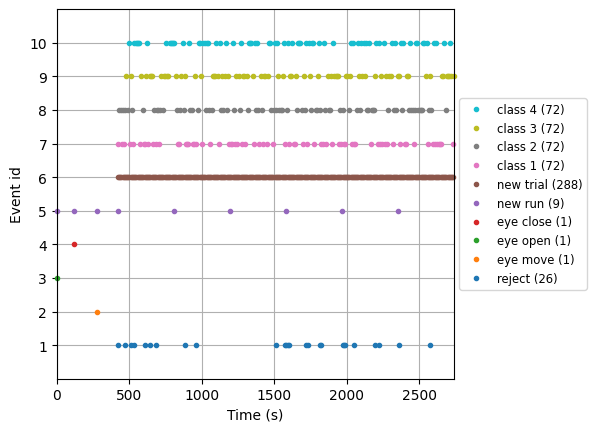

In [76]:
fig=mne.viz.plot_events(events[0],event_id=event_dict,sfreq=raw.info['sfreq'],first_samp=raw.first_samp,on_missing="warn")

In [77]:
#in medecal lang epoch is eeg reading 
epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],tmin= -0.1, tmax=0.7, preload=True,on_missing="warn")

Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


In [78]:
epochs.get_data().shape #no of epochs, channels, length of signal data

C:\Users\mshar\AppData\Local\Temp\ipykernel_16900\2796709754.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape


(288, 22, 201)

In [79]:
label=epochs.events[:,-1]
features=epochs.events[:,:2]
print(label)
print(label.shape)
print(features.shape)

[ 7  8  8  7  8  7  8  9  8 10  7  9  8  7 10 10 10 10 10  7  9  8  7  7
  9 10  7  9  9  9  7  8  7  8  8  7  8  9  8  9  9 10  9  9 10 10 10 10
 10  9  8  7  7  8  9 10  8  9  7  7  7 10  8  8  7  7  9  7  8 10 10  9
  7 10 10  8 10 10  8  7  8  9  9  9 10  9  7 10  8  9  8  9 10  8  9  7
  7  7 10  8  7  9  7  9  8 10  7  9  9  7  9  8 10 10 10  9  7 10  8 10
  8  7  9  8  7  9  9  7  9 10 10  8  7  8 10  8 10  9  8  8  8  9 10  7
  8 10  7  9  9 10  7  7  9  8 10 10 10  8  7  9  8 10  7 10  9  8 10 10
  7  8  8  9 10  8  7  7 10  8  7  9  8  8  9  7 10  9  9  9  9  7  8  7
  8  7  7  9  9  8  9 10  7 10  7  7  8 10  9  8 10  9 10  9 10  8  8 10
  7  8  8  8  9 10  7 10  7  9  7 10  7  9  7  8  9  9 10  7  8 10  8  9
  9  7 10  8 10  7  7  9  9  8 10  8  8  7  8 10 10  8  8  8  8 10 10  9
 10  7  8  9  8  7 10  7 10  7  7  7  7  9  9 10  8  9  9  9 10  9  7  9]
(288,)
(288, 2)


In [80]:
# in madecal lang evoked is epoch in wich stimulation is present
# evoked is avg. of epoch
evoked_0 = epochs['7'].average()
evoked_1 = epochs['8'].average()
evoked_2 = epochs['9'].average()
evoked_3 = epochs['10'].average()


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


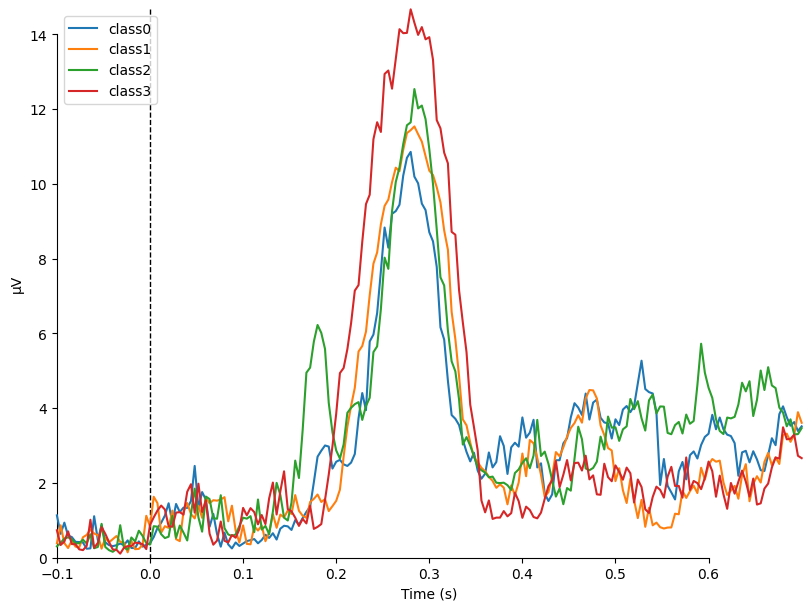

[<Figure size 800x600 with 1 Axes>]

In [81]:
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1,'class2':evoked_2,'class3':evoked_3}

mne.viz.plot_compare_evokeds(dicts)

In [82]:
# defining the function for data sepetating fetures and lables combing all we have done above

def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels


In [83]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'./dataset_eeg/BCICIV_2a_gdf/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))


In [84]:
labels

[array([10,  9,  8,  7,  7,  8,  9, 10,  8,  9,  7,  7,  7, 10,  8,  8,  7,
         7,  9,  7,  8, 10, 10,  9,  7, 10, 10,  8, 10, 10,  8,  7,  8,  9,
         9,  9, 10,  9,  7, 10,  8,  9,  8,  9, 10,  8,  9,  7,  7,  7, 10,
         8,  7,  9,  7,  9,  8, 10,  7,  9,  9,  7,  9,  8, 10, 10, 10,  9,
         7, 10,  8, 10,  8,  7,  9,  8,  7,  9,  9,  7,  9, 10, 10,  8,  7,
         8, 10,  8, 10,  9,  8,  8,  8,  9, 10,  7,  8, 10,  7,  9,  9, 10,
         7,  7,  9,  8, 10, 10, 10,  8,  7,  9,  8, 10,  7, 10,  9,  8, 10,
        10,  7,  8,  8,  9, 10,  8,  7,  7, 10,  8,  7,  9,  8,  8,  9,  7,
        10,  9,  9,  9,  9,  7,  8,  7,  8,  7,  7,  9,  9,  8,  9, 10,  7,
        10,  7,  7,  8, 10,  9,  8, 10,  9, 10,  9, 10,  8,  8, 10,  7,  8,
         8,  8,  9, 10,  7, 10,  7,  9,  7, 10,  7,  9,  7,  8,  9,  9, 10,
         7,  8, 10,  8,  9,  9,  7, 10,  8, 10,  7,  7,  9,  9,  8, 10,  8,
         8,  7,  8, 10, 10,  8,  8,  8,  8, 10, 10,  9, 10,  7,  8,  9,  8,
         7, 

In [85]:
# we have to concatinate it now
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

# 2448 lenght of our dataset ,22 ->number of ports,total reading ->176

((2448, 22, 176), (2448,), (2448,))

In [86]:
np.isnan(features).sum()

0

In [89]:
np.isnan(labels).sum()

0

In [90]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([ 7,  8,  9, 10]), array([648, 648, 576, 576], dtype=int64))

In [91]:
unique, counts = np.unique(groups, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([288, 288, 288, 144, 288, 288, 288, 288, 288], dtype=int64))

In [92]:
np.savez("eeg_22_channel_data",input=features,targets=labels)